In [1]:
from datasets import BasicDataset
from models import XGBModel

In [2]:
ds = BasicDataset(
    ohe_features=[
        "CONTRACT_CREDIT_INTERMEDIARY",
        "CONTRACT_CURRENCY",
        "CONTRACT_FREQUENCY_TYPE",
        "CONTRACT_LOAN_CONTRACT_TYPE",
        "CONTRACT_LOAN_TYPE",
        "CONTRACT_MORTGAGE_TYPE",
        "CONTRACT_REFINANCED",
        "CONTRACT_TYPE_OF_INTEREST_REPAYMENT",
        "BORROWER_TYPE_OF_CUSTOMER",
        "BORROWER_TYPE_OF_SETTLEMENT",
    ],
    le_features=[
        "CONTRACT_BANK_ID",
        "BORROWER_CITIZENSHIP",
        "BORROWER_COUNTRY",
        "BORROWER_COUNTY"
    ],
    categorical_features=[],
    log_transform_features=[
        "CONTRACT_CREDIT_LOSS",
        "CONTRACT_INCOME",
        "CONTRACT_LOAN_AMOUNT",
        "CONTRACT_MARKET_VALUE",
        "CONTRACT_MORTGAGE_LENDING_VALUE",
    ],
    numerical_features=[],
)

/Users/peter.nagy/repos/datarace23/datasets/base.py:194: RuntimeWarning: divide by zero encountered in log
  df[feature] = df[feature].apply(lambda x: np.where(x > 0, np.log(x), 0))
/Users/peter.nagy/repos/datarace23/datasets/base.py:194: RuntimeWarning: invalid value encountered in log
  df[feature] = df[feature].apply(lambda x: np.where(x > 0, np.log(x), 0))
/Users/peter.nagy/repos/datarace23/datasets/base.py:194: RuntimeWarning: divide by zero encountered in log
  df[feature] = df[feature].apply(lambda x: np.where(x > 0, np.log(x), 0))
/Users/peter.nagy/repos/datarace23/datasets/base.py:194: RuntimeWarning: invalid value encountered in log
  df[feature] = df[feature].apply(lambda x: np.where(x > 0, np.log(x), 0))


In [3]:
ds.save()

'2023-11-12-20-36-3ab2a'

In [4]:
ds = BasicDataset.load(save_id='2023-11-12-20-36-3ab2a')

In [3]:
model = XGBModel(
    {
        "n_estimators": 100,
        "max_depth": 10,
        "learning_rate": 0.1,
        "subsample": 0.5,
        "colsample_bytree": 0.5,
        "reg_alpha": 1,
        "reg_lambda": 1,
        "random_state": 42,
        "n_jobs": 4,
    }
)

In [4]:
model.fit(ds)

Cross-validation scores mean: 0.9930257541938113, std: 0.0001151303535932522
Test score: 0.9936169000170976


0.9936169000170976

In [9]:
model.save()

'2023-11-12-20-38-381ab'

In [10]:
model = XGBModel.load(save_id='2023-11-12-20-38-381ab')

In [13]:
model.predict(ds).PRED.value_counts()

PRED
0    488992
1      1302
Name: count, dtype: int64

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

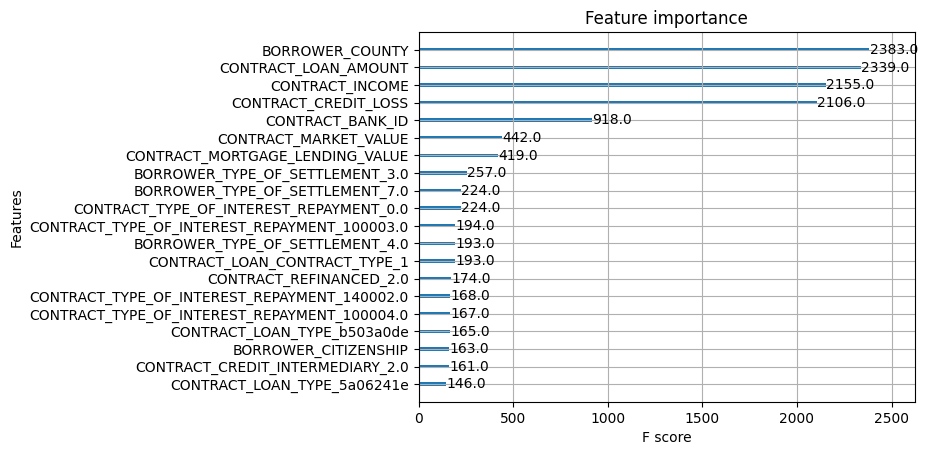

In [14]:
from xgboost import plot_importance

plot_importance(model.model, max_num_features=20)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
[20:44:42] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


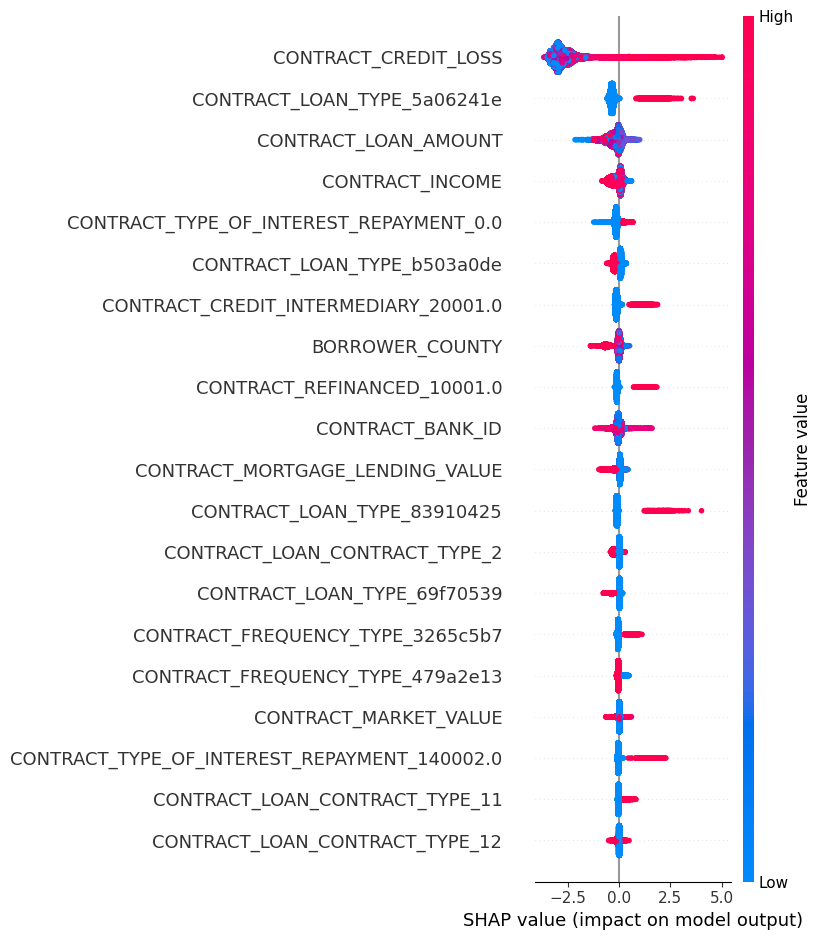

In [15]:
import shap

explainer = shap.TreeExplainer(model.model)
shap_values = explainer.shap_values(model.X_test)

shap.summary_plot(shap_values, model.X_test, max_display=20)